In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [4]:
df = pd.read_csv("final_dataset.csv")

In [17]:
df.head(10)

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0
5,5,2018-04-01 00:10:45,568,8803,44.71,645,0,0,0
6,6,2018-04-01 00:11:30,2803,5490,96.03,690,0,0,0
7,7,2018-04-01 00:11:44,4684,2486,24.36,704,0,0,0
8,8,2018-04-01 00:11:53,4128,8354,26.34,713,0,0,0
9,9,2018-04-01 00:13:44,541,6212,59.07,824,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TRANSACTION_ID     int64  
 1   TX_DATETIME        object 
 2   CUSTOMER_ID        int64  
 3   TERMINAL_ID        int64  
 4   TX_AMOUNT          float64
 5   TX_TIME_SECONDS    int64  
 6   TX_TIME_DAYS       int64  
 7   TX_FRAUD           int64  
 8   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 120.4+ MB


In [8]:
df.columns

Index(['TRANSACTION_ID', 'TX_DATETIME', 'CUSTOMER_ID', 'TERMINAL_ID',
       'TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS', 'TX_FRAUD',
       'TX_FRAUD_SCENARIO'],
      dtype='object')

In [9]:
df["TX_FRAUD"].value_counts()

TX_FRAUD
0    1739474
1      14681
Name: count, dtype: int64

In [10]:
df["TX_FRAUD_SCENARIO"].value_counts()

TX_FRAUD_SCENARIO
0    1739474
2       9077
3       4631
1        973
Name: count, dtype: int64

In [11]:
df["TX_FRAUD_SCENARIO"].unique()

array([0, 1, 3, 2])

In [12]:
df = df[df["TX_FRAUD_SCENARIO"].isin([0,1])]
print(df["TX_FRAUD_SCENARIO"].value_counts())

TX_FRAUD_SCENARIO
0    1739474
1        973
Name: count, dtype: int64


In [13]:
df.isnull().sum().sum()

np.int64(0)

In [15]:
df.shape

(1740447, 9)

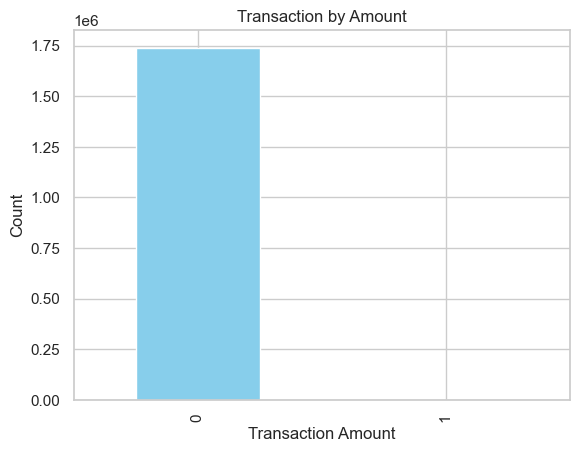

In [ ]:
#CLASS DISTRIBUTION
df["TX_FRAUD"].value_counts().plot(kind="bar",title="Transaction by Amount",color="skyblue")
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.show()

In [19]:
df["TX_AMOUNT"].describe().astype(int)

count    1740447
mean          53
std           39
min            0
25%           20
50%           44
75%           76
max          310
Name: TX_AMOUNT, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

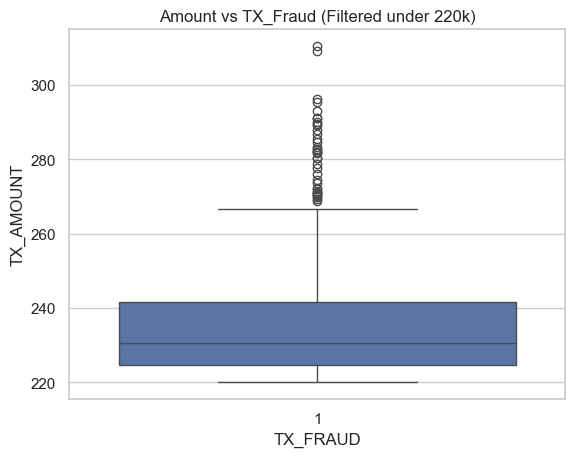

In [25]:
sns.boxplot(data=df[df["TX_AMOUNT"]>220], x = "TX_FRAUD", y = "TX_AMOUNT")
plt.title("Amount vs TX_Fraud (Filtered under 220k)")
plt.show

In [26]:
print(df[df["TX_AMOUNT"] > 220]["TX_FRAUD"].value_counts())

TX_FRAUD
1    973
Name: count, dtype: int64


In [27]:
X = df.drop(columns=['TX_FRAUD','TRANSACTION_ID','CUSTOMER_ID','TERMINAL_ID'])


In [28]:
X['TX_DATETIME']= pd.to_datetime(X['TX_DATETIME']).astype(int)/10**9

In [29]:
y= df["TX_FRAUD"]

In [30]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [31]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train , y_train)

In [32]:
X_train

,TX_DATETIME,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD_SCENARIO
1006768,1.531605e+09,2.78,9063703,104,0
1525204,1.536302e+09,86.66,13761194,159,0
1102315,1.532471e+09,54.84,9930293,114,0
1062005,1.532101e+09,3.08,9560257,110,0
981250,1.531387e+09,65.81,8846653,102,0
...,...,...,...,...,...
866220,1.530351e+09,98.17,7810092,90,0
707036,1.528902e+09,34.23,6361634,73,0
416660,1.526295e+09,116.15,3753942,43,0
1253416,1.533827e+09,27.09,11286261,130,0


In [34]:
y_train

1006768    0
1525204    0
1102315    0
1062005    0
981250     0
          ..
866220     0
707036     0
416660     0
1253416    0
1593958    0
Name: TX_FRAUD, Length: 1218312, dtype: int64

In [35]:
df["TX_FRAUD_SCENARIO"].value_counts()

TX_FRAUD_SCENARIO
0    1739474
1        973
Name: count, dtype: int64

In [36]:
df["TX_FRAUD"].value_counts()

TX_FRAUD
0    1739474
1        973
Name: count, dtype: int64